# Representation of multiple qubit states

References: 

Qiskit textbook Reference:
1. https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html

Qiskit Documentation:

2. https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

IBM Operations Glossary

3.https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
from math import pi

***
## MULTIPLE QUBIT STATES
***

- For 1 qubit we have 2 states: 0 and 1
- For 2 qubits we have 4 states: 00 01 10 11
- n qubits we have 2^n states

EXAMPLE 1:

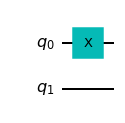

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.draw(output="mpl")

In [3]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

 ####               NOTE
    
    q1  q0
    0    0
    0    1*********************
    1    0
    1    1

### IMP : Qiskit Ordering 
   https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
        
"Basis vector ordering in Qiskit"

   REFERENCE:
   https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

### In other words :
    |MSB -------- LSB>. i.e. |q1q0>, |q3q2q1q0>

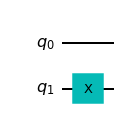

In [4]:
qc=QuantumCircuit(2)
qc.x(1)
qc.draw(output="mpl")

In [5]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

EXAMPLE 2:

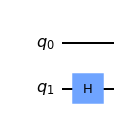

In [6]:
qc=QuantumCircuit(2)
qc.h(1)
qc.draw(output="mpl")

In [7]:
state = Statevector.from_instruction(qc)
state.draw(output='latex')

<IPython.core.display.Latex object>

In [8]:
backend = Aer.get_backend('unitary_simulator')

job = execute(qc, backend)
result = job.result()
#Obtain the unitary matrix for cx gate
print(result.get_unitary(qc, decimals=3))

[[ 0.707+0.j  0.   +0.j  0.707-0.j  0.   +0.j]
 [ 0.   +0.j  0.707+0.j  0.   +0.j  0.707-0.j]
 [ 0.707+0.j -0.   +0.j -0.707+0.j -0.   +0.j]
 [-0.   +0.j  0.707+0.j -0.   +0.j -0.707+0.j]]


In [9]:
backend = Aer.get_backend('aer_simulator')
qc.save_unitary()
qc_circuit = assemble(qc)
qc_obj= backend.run(qc_circuit)
unitary=qc_obj.result().get_unitary()



/Users/dimplebavlecha/opt/anaconda3/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


In [10]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary)

<IPython.core.display.Latex object>